In [ ]:
# import packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST
(x_train, _), (x_test, _) = mnist.load_data()


# change datatype to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# scale the dataset from 0->255 to 0->1
x_train /= 255.0
x_test /= 255.0

# flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [ ]:
print(x_train[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# create the autoencoder model
def model_fn():
    model_input = tf.keras.layers.Input(shape=(784,))

    # Encoder part (decreasing number of units)
    encoded = tf.keras.layers.Dense(units=512, activation='relu')(model_input)
    encoded = tf.keras.layers.Dense(units=128, activation='relu')(encoded)
    encoded = tf.keras.layers.Dense(units=64, activation='relu')(encoded)
    latent_vector= tf.keras.layers.Dense(units=32, name="latent_vector")(encoded) # Latent Space

    # Decoder part (increasing number of units, symmetric to encoder)
    decoded = tf.keras.layers.Dense(units=32, activation='relu')(latent_vector)
    decoded = tf.keras.layers.Dense(units=64, activation='relu')(decoded)
    decoded = tf.keras.layers.Dense(units=128, activation='relu')(decoded)
    decoded = tf.keras.layers.Dense(units=512, activation='relu')(decoded)
    decoded_output = tf.keras.layers.Dense(units=784,activation='sigmoid')(decoded) # Output layer

    # the autoencoder model
    autoencoder_model = tf.keras.Model(inputs=model_input, outputs=decoded_output)

    # compile the model
    autoencoder_model.compile(
        optimizer= tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
        loss='MSE',
    )
    return autoencoder_model


# build the model
autoencoder_model = model_fn()

# print autoencoder model summary
autoencoder_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_vector (Dense)           │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 784)            │       402,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 957,648 (3.65 MB)

 Trainable params: 957,648 (3.65 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# train the model
# Using a reduced number of epochs for demonstration (original was 1000)
autoencoder_history=autoencoder_model.fit(x_train, x_train,
                      epochs=300, # Reduced for time/resource
                      batch_size=256,
                      shuffle=True,
                      validation_data=(x_test, x_test))

Epoch 1/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0285 - val_loss: 0.0281
Epoch 2/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0284 - val_loss: 0.0280
Epoch 3/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0284 - val_loss: 0.0280
Epoch 4/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0283 - val_loss: 0.0279
Epoch 5/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0283 - val_loss: 0.0279
Epoch 6/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0283 - val_loss: 0.0279
Epoch 7/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0282 - val_loss: 0.0278
Epoch 8/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0282 - val_loss: 0.0278
Epoch 9/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0283 - val_loss: 0.0277
Epoch 10/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0281 - val_loss: 0.0277
Epoch 11/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0280 - val_loss: 0.0277
Epoch 12/300
235/235 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


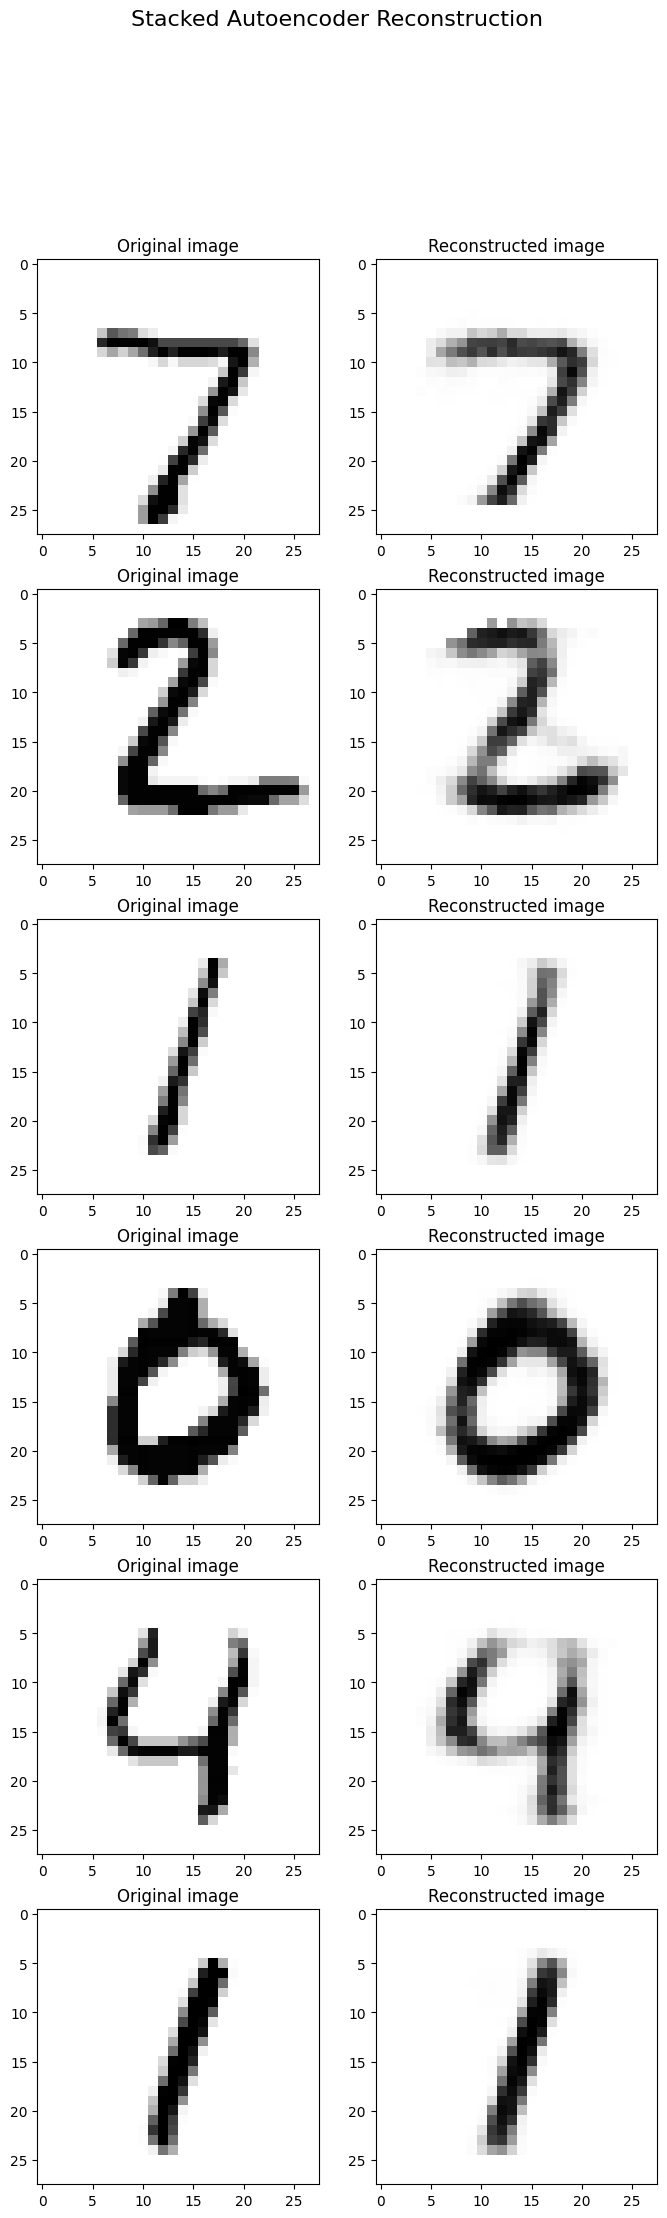

In [43]:
# visualize reconstruction
sample_size = 6
test_image = x_test[:sample_size]

# reconstruct test samples
test_reconstruction = autoencoder_model.predict(test_image)

plt.figure(figsize=(8, 25))
plt.suptitle('Stacked Autoencoder Reconstruction', fontsize=16)

for i in range(sample_size):
    # Original image
    plt.subplot(sample_size, 2, i*2 + 1)
    plt.title('Original image')
    plt.imshow(test_image[i].reshape((28, 28)), cmap="Greys",
               interpolation="nearest", aspect='auto')

    # Reconstructed image
    plt.subplot(sample_size, 2, i*2 + 2)
    plt.title('Reconstructed image')
    plt.imshow(test_reconstruction[i].reshape((28, 28)), cmap="Greys",
               interpolation="nearest", aspect='auto')

plt.show()


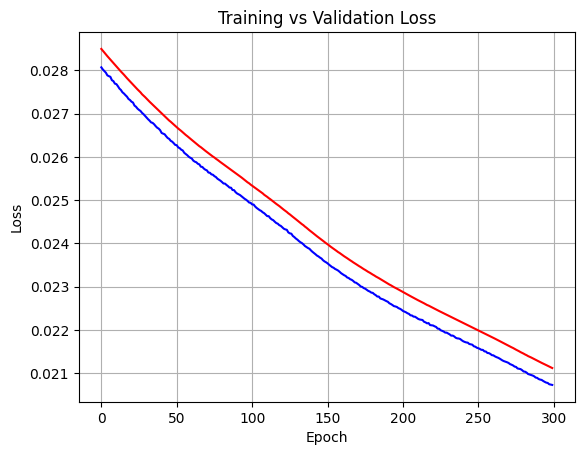

In [44]:
# Visualization
# Visulaizing the loss
train_loss = autoencoder_history.history['loss']
validation_loss = autoencoder_history.history['val_loss']
epochs = range(len(train_loss))

plt.plot(epochs, train_loss , 'r', label="training loss")
plt.plot(epochs, validation_loss, 'b', label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()

In [ ]:
# Latent Space Extraction
encoder = tf.keras.Model(
    inputs=autoencoder_model.input,
    outputs=autoencoder_model.get_layer("latent_vector").output
)

x_train_latent = encoder.predict(x_train)
x_test_latent  = encoder.predict(x_test)

(_, y_train_latent), (_, y_test_latent) = tf.keras.datasets.mnist.load_data()



print(x_train_latent.shape)  # (60000, 32)



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(60000, 32)


In [ ]:
import tensorflow as tf
from tensorflow import keras as ks

### Model Definition ###
# hyperparameters
learning_rate = 0.01
training_epochs = 100
display_step = 50  # print loss after 50 epochs

# Initialization
n_samples = x_train_latent.shape[0]
batch_size = 50
total_batch = int(n_samples / batch_size)

n_input_features = x_train_latent.shape[1]  # size of data input (# size of each element of x), should be 32
n_classes = 10  # number of classes, MNIST has 10 classes (0-9)

# Build the model using tf.keras layers
MCSVM_model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        n_classes,
        activation='linear',  # Use 'linear' for SVM
        input_shape=(n_input_features,)
    )
])

# Custom multi-class hinge loss function
def multiclass_hinge_loss(y_true, y_pred):
    # Cast y_true to an integer type (e.g., tf.int32) before passing to tf.one_hot
    y_true_int = tf.cast(y_true, tf.int32)
    y_true_onehot = tf.one_hot(y_true_int, depth=n_classes)
    correct_class_score = tf.reduce_sum(y_pred * y_true_onehot, axis=1, keepdims=True)
    margins = tf.maximum(0.0, y_pred - correct_class_score + 1.0)
    margins = margins - tf.multiply(margins, y_true_onehot)  # zero out correct class
    return tf.reduce_mean(tf.reduce_sum(margins, axis=1))

# Define optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Compile the model
MCSVM_model.compile(
    optimizer=optimizer,
    loss=multiclass_hinge_loss,  # Use custom hinge loss
    metrics=['accuracy']
)

# Train the model
history = MCSVM_model.fit(
    x_train_latent, y_train_latent,
    epochs=training_epochs,
    batch_size=batch_size,
    verbose=1,  # Print progress
    callbacks=[ks.callbacks.EarlyStopping(min_delta=0.01, patience=20)]
)

# After training, predict using the model
y_predicted = MCSVM_model.predict(x_test_latent)  # Use .predict() for prediction

# Model summary
MCSVM_model.summary()

# Evaluate the model on the training set
train_loss, train_accuracy = MCSVM_model.evaluate(x_train_latent, y_train_latent, verbose=0)
print("Training Loss: ", train_loss)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6694 - loss: 2.6871
Epoch 2/100
  76/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7501 - loss: 1.2296

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7656 - loss: 1.1411
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7795 - loss: 1.0528
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7862 - loss: 1.0240
Epoch 5/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7879 - loss: 0.9903
Epoch 6/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7956 - loss: 0.9605
Epoch 7/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7991 - loss: 0.9419
Epoch 8/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7967 - loss: 0.9600
Epoch 9/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8049 - loss: 0.9207
Epoch 10/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8032 - loss: 0.9279
Epoch 11/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8052 - loss: 0.9107
Epoch 12/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8038 - loss: 0.9104
Epoch 13/100
1200/1200 ━━━━━━━

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 332 (1.30 KB)

 Trainable params: 330 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Training Loss:  0.6631919145584106


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist

# Convert y_predicted from continuous scores to discrete class labels
y_predicted_labels = np.argmax(y_predicted, axis=1)

acc = accuracy_score(y_test_latent, y_predicted_labels)
print("\nSVM Accuracy:", acc)
print("\nClassification Report:")
print(classification_report(y_test_latent, y_predicted_labels))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_latent, y_predicted_labels))



SVM Accuracy: 0.8666

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       980
           1       0.98      0.96      0.97      1135
           2       0.81      0.90      0.85      1032
           3       0.88      0.86      0.87      1010
           4       0.82      0.88      0.85       982
           5       0.88      0.73      0.80       892
           6       0.90      0.89      0.89       958
           7       0.94      0.79      0.86      1028
           8       0.82      0.83      0.83       974
           9       0.76      0.86      0.81      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000


Confusion Matrix:
[[ 936    0    6    2    5   17    9    1    3    1]
 [   0 1095    9    4    1    1    5    1   18    1]
 [  18    1  928    8   18    2   18   10   26    3]
 [   4    2   50 